In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
import tensorflow_datasets as tfds

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
de_credit, info = tfds.load('german_credit_numeric', split='train', with_info=True)
de_credit_df = tfds.as_dataframe(de_credit, info)

de_credit_df.head()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/german_credit_numeric/1.0.0.incompleteOAOWOH/german_credit_numeric-train.tfrecord


  0%|          | 0/1000 [00:00<?, ? examples/s]

Dataset german_credit_numeric downloaded and prepared to /root/tensorflow_datasets/german_credit_numeric/1.0.0. Subsequent calls will reuse this data.


,features,label
0,"[3, 6, 4, 13, 2, 5, 1, 4, 3, 28, 3, 2, 2, 2, 1...",1
1,"[4, 4, 2, 6, 1, 2, 2, 3, 1, 23, 3, 1, 2, 1, 1,...",1
2,"[4, 24, 4, 20, 1, 3, 2, 4, 3, 37, 3, 1, 1, 2, ...",1
3,"[4, 18, 2, 11, 5, 2, 2, 2, 1, 21, 3, 1, 1, 2, ...",1
4,"[4, 6, 2, 13, 3, 3, 1, 4, 1, 62, 3, 1, 1, 1, 1...",1


In [3]:
df = de_credit_df.features.apply(pd.Series)
df.columns = [f"f_{i}" for i in range(df.shape[1])]

df_data = pd.concat([df, de_credit_df.label], axis=1)

print(df_data.shape)
df_data.head()

(1000, 25)


,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,label
0,3,6,4,13,2,5,1,4,3,28,3,2,2,2,1,1,0,1,0,0,1,0,0,1,1
1,4,4,2,6,1,2,2,3,1,23,3,1,2,1,1,0,0,1,0,1,0,0,1,0,1
2,4,24,4,20,1,3,2,4,3,37,3,1,1,2,1,1,0,1,0,0,1,0,0,1,1
3,4,18,2,11,5,2,2,2,1,21,3,1,1,2,1,0,0,1,0,1,0,0,0,1,1
4,4,6,2,13,3,3,1,4,1,62,3,1,1,1,1,0,0,1,0,0,1,0,0,1,1


In [4]:
info

tfds.core.DatasetInfo(
    name='german_credit_numeric',
    version=1.0.0,
    description='This dataset classifies people described by a set of attributes as good or bad
credit risks. The version here is the "numeric" variant where categorical and
ordered categorical attributes have been encoded as indicator and integer
quantities respectively.',
    homepage='https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)',
    features=FeaturesDict({
        'features': Tensor(shape=(24,), dtype=tf.int32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=2),
    }),
    total_num_examples=1000,
    splits={
        'train': 1000,
    },
    supervised_keys=('features', 'label'),
    citation="""@misc{Dua:2019 ,
    author = "Dua, Dheeru and Graff, Casey",
    year = "2017",
    title = "{UCI} Machine Learning Repository",
    url = "http://archive.ics.uci.edu/ml",
    institution = "University of California, Irvine, School of Information and Computer Sciences"

In [5]:
train_len = int(df_data.shape[0] * 0.75)

df_train = df_data[:train_len]
df_val = df_data[train_len:]

X_train = df_train.drop('label', axis=1)
Y_train = df_train.label


X_val = df_val.drop('label', axis=1)
Y_val = df_val.label


print(f"X Train: ", X_train.shape)
print(f"Y Train: ", Y_train.shape)
print(f"X Val: ", X_val.shape)
print(f"Y Val: ", Y_val.shape)

X Train:  (750, 24)
Y Train:  (750,)
X Val:  (250, 24)
Y Val:  (250,)


In [6]:
def dnn_model(epochs, callbacks=None):
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')])

    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=epochs, callbacks=callbacks)
    
    return history, model

hist, model = dnn_model(250)

Epoch 1/250
24/24 [==============================] - 3s 14ms/step - loss: 0.7076 - accuracy: 0.6933 - val_loss: 0.6248 - val_accuracy: 0.6800
Epoch 2/250
24/24 [==============================] - 0s 5ms/step - loss: 0.5147 - accuracy: 0.7520 - val_loss: 0.6600 - val_accuracy: 0.6800
Epoch 3/250
24/24 [==============================] - 0s 5ms/step - loss: 0.5041 - accuracy: 0.7627 - val_loss: 0.6531 - val_accuracy: 0.6920
Epoch 4/250
24/24 [==============================] - 0s 5ms/step - loss: 0.4914 - accuracy: 0.7560 - val_loss: 0.6242 - val_accuracy: 0.7240
Epoch 5/250
24/24 [==============================] - 0s 5ms/step - loss: 0.4980 - accuracy: 0.7573 - val_loss: 0.7517 - val_accuracy: 0.6880
Epoch 6/250
24/24 [==============================] - 0s 5ms/step - loss: 0.4892 - accuracy: 0.7560 - val_loss: 0.6680 - val_accuracy: 0.7000
Epoch 7/250
24/24 [==============================] - 0s 5ms/step - loss: 0.6062 - accuracy: 0.7133 - val_loss: 1.0363 - val_accuracy: 0.6880
Epoch 8/250


In [7]:
print(f"Training Set:   {model.evaluate(X_train, Y_train)}")
print(f"Validation Set: {model.evaluate(X_val, Y_val)}")

24/24 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 1.0000
Training Set:   [0.018643029034137726, 1.0]
8/8 [==============================] - 0s 2ms/step - loss: 1.7872 - accuracy: 0.7240
Validation Set: [1.7872077226638794, 0.7239999771118164]


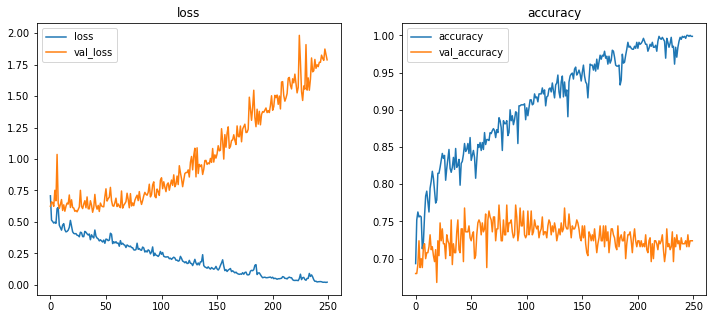

In [8]:
def plot(history):
    fig, axs = plt.subplots(1,2, figsize=(12, 5))

    hist = history.history

    for ax, metric in zip(axs, ["loss", "accuracy"]):
        ax.plot(hist[metric])
        ax.plot(hist["val_"+metric])
        ax.legend([metric, "val_" + metric])
        ax.set_title(metric)

plot(hist)

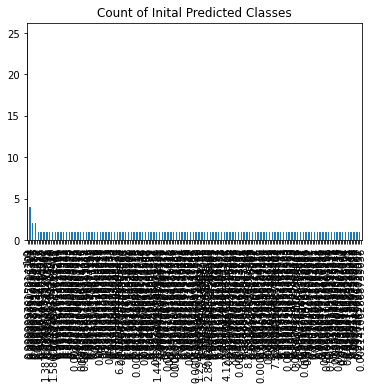

In [11]:
#look at the predictions
preds_classes = model.predict(X_val)
#predict_x=model.predict(X_test) 
pd.Series(preds_classes.flatten()).value_counts().plot(kind='bar', title="Count of Inital Predicted Classes")

In [12]:
#look at the original data
X_train.describe()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.00000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,2.540000,20.574667,2.498667,32.162667,2.096000,3.374667,2.672000,2.82800,2.358667,35.569333,2.669333,1.392000,1.165333,1.400000,1.037333,0.245333,0.097333,0.909333,0.04000,0.177333,0.717333,0.024000,0.202667,0.626667
std,1.252128,12.069189,1.076201,27.673380,1.578852,1.210611,0.694545,1.12551,1.051744,11.340223,0.712275,0.578604,0.371729,0.490225,0.189704,0.430572,0.296609,0.287326,0.19609,0.382205,0.450596,0.153151,0.402254,0.484012
min,1.000000,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,2.000000,13.000000,1.000000,3.000000,2.000000,2.00000,1.000000,27.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,18.000000,2.000000,23.000000,1.000000,3.000000,3.000000,3.00000,2.000000,33.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,4.000000,24.000000,4.000000,39.000000,3.000000,4.000000,3.000000,4.00000,3.000000,42.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,4.000000,60.000000,4.000000,184.000000,5.000000,5.000000,4.000000,4.00000,4.000000,75.000000,3.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
